
<h1 align="center"> Assignment - 1 (Machine Learning) </h1>

<h2 align="left"> Linear Regression </h2> 
<h4 align="right" > 
    Author: <a href="https://jimut123.github.io/">Jimut Bahan Pal </a>
</h4> 

#### As usual, importing the necessary libraries

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import datasets, linear_model
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Creation of 1D dataset


Artificially generated 1D dataset, using y = 4x + $\epsilon$. Here, Gaussian noise $\epsilon$ = 6.

In [128]:
X, y = make_regression(n_samples=100, n_features=1, noise=6)

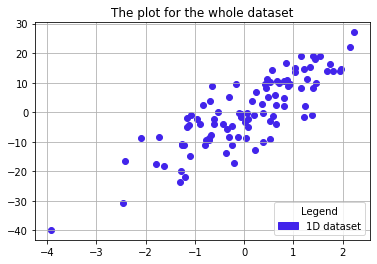

In [129]:
# plot regression dataset

fig, ax = plt.subplots()

ax.set_title('The plot for the whole dataset')
scatter = ax.scatter(X,y,color='#4224eb')
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)

red_patch = mpatches.Patch(color='#4224eb', label='1D dataset')
plt.legend(handles=[red_patch],loc="lower right", title="Legend")

ax.grid(True)
plt.show()


In [130]:

# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]


In [131]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [132]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

#### Root mean squared error

In [133]:
# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


Coefficients: 
 [8.80376256]
Mean squared error: 49.60
Coefficient of determination: 0.72


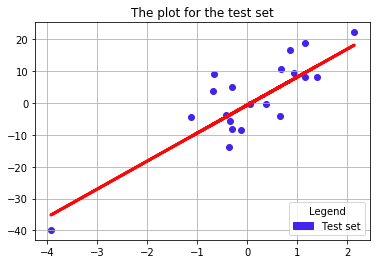

In [134]:
# Plot outputs

fig, ax = plt.subplots()

ax.set_title('The plot for the test set')
scatter = ax.scatter(X_test, y_test,color='#4224eb')
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)

red_patch = mpatches.Patch(color='#4224eb', label='Test set')
plt.legend(handles=[red_patch],loc="lower right", title="Legend")

plt.plot(X_test, y_pred, color='#f90909', linewidth=3)

# plt.xticks(())
# plt.yticks(())

ax.grid(True)
plt.show()

#### References


https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
https://stackoverflow.com/questions/17411940/matplotlib-scatter-plot-legend
https://htmlcolorcodes.com/color-picker/
https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/scatter_with_legend.html